## Práctica en aula: Grafos de De bruijn

In [65]:
import networkx as nx
import matplotlib.pyplot as plt

### 1. Definición de los k-mers

In [66]:
kmers = ["AGTT", "GTTG", "TTGA", "TGAC", "GACG", "ACGA", "CGAA", "GAAC", "AACG"]
kmers = ["ACG", "CGT", "GTG", "TGA", "GAC"]

## 2. Creación de los prefijos y sufijos y construcción del grafo

In [67]:
def create_graph(kmers):
    graph = {}

    for mer in kmers:
        prefix = mer[:-1]
        suffix = mer[1:]

        graph[prefix] = suffix

    return graph

In [68]:
graph = create_graph(kmers)

## 3. Conversión del grafo a un objeto de NetworkX

In [69]:
def build_networkx_graph(graph):
    networkx_grapf = nx.DiGraph()

    for prefix, sufix in graph.items():
        networkx_grapf.add_edge(prefix, sufix, label=f"{prefix}{sufix[-1]}")

    return networkx_grapf

In [70]:
networkx_graph = build_networkx_graph(graph)

## 4. Visualización del grafo

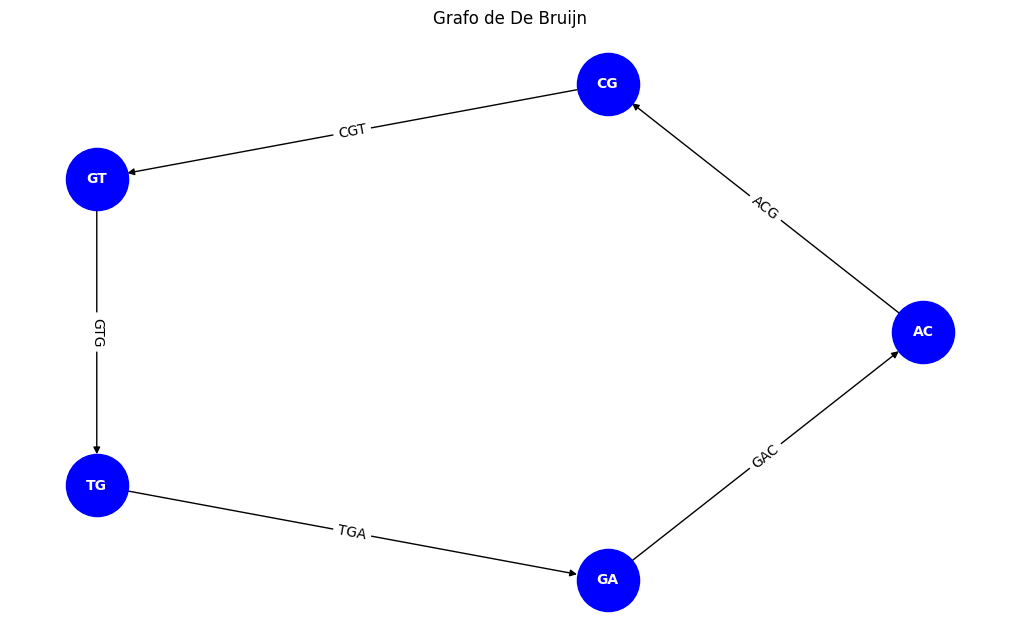

In [71]:
authomatic_pos = nx.circular_layout(networkx_graph)
plt.figure(figsize=(10, 6))
nx.draw(networkx_graph, authomatic_pos, with_labels=True, node_size=2000, node_color="blue", font_size=10, font_weight="bold", edge_color="black", font_color="white")
edge_labels = nx.get_edge_attributes(networkx_graph, 'label')
nx.draw_networkx_edge_labels(networkx_graph, authomatic_pos, edge_labels=edge_labels, font_color="black")
plt.title("Grafo de De Bruijn")
plt.show()

## 5. Construcción del camino Euleriano

In [72]:
def is_eulerian_cycle(graph):
    in_degrees = dict(graph.in_degree())
    out_degrees = dict(graph.out_degree())
    
    for node in in_degrees:
        if in_degrees[node] != out_degrees[node]:
            return False
        
    if nx.is_strongly_connected(graph):
        return True
    else:
        return False
    
def is_eulerian_path(graph):

    in_degrees = dict(graph.in_degree())
    out_degrees = dict(graph.out_degree())
    nodes_equal_degrees = [node for node in in_degrees if in_degrees[node] == out_degrees[node]]

    start_nodes =  [node for node in in_degrees if out_degrees[node] - in_degrees[node] == 1]
    end_nodes = [node for node in out_degrees if in_degrees[node] - out_degrees[node] == 1]

    if len(start_nodes) == 1 and len(end_nodes) == 1:
        if len(nodes_equal_degrees) == len(graph.nodes()) - 2:
            return True
    return False

def find_eulerian_path(graph, is_eularian_cycle, is_eularian_path):
    if is_eularian_cycle(graph):
        eulerian_path = list(nx.eulerian_circuit(graph))
    elif is_eularian_path(graph):
        eulerian_path = list(nx.eulerian_path(graph))
    else:
        eulerian_path = None
    
    return eulerian_path


In [73]:
eulerian_path = find_eulerian_path(networkx_graph, is_eulerian_cycle, is_eulerian_path)

## 6. Visualización del camino Euleriano

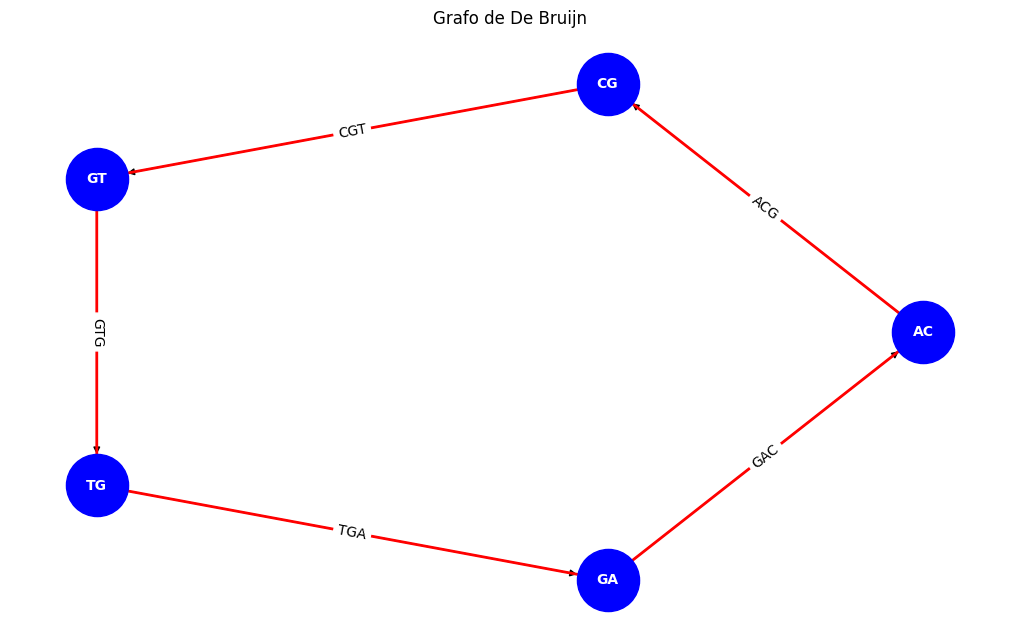

In [74]:
authomatic_pos = nx.circular_layout(networkx_graph)
plt.figure(figsize=(10, 6))
nx.draw(networkx_graph, authomatic_pos, with_labels=True, node_size=2000, node_color="blue", font_size=10, font_weight="bold", edge_color="black", font_color="white")
for i in range(len(eulerian_path)):
    nx.draw_networkx_edges(networkx_graph, authomatic_pos, edgelist=[(eulerian_path[i][0], eulerian_path[i][1])], edge_color="red", width=2)

edge_labels = nx.get_edge_attributes(networkx_graph, 'label')
nx.draw_networkx_edge_labels(networkx_graph, authomatic_pos, edge_labels=edge_labels, font_color="black")
plt.title("Grafo de De Bruijn")
plt.show()

## 7. Reconstrucción de la secuencia original

In [ ]:
def assemble_sequence(eulerian_path):

    dna_sequence = eulerian_path[0][0]

    for _, destination in eulerian_path:
        dna_sequence += destination[-1]

    return dna_sequence

In [ ]:
assemble_sequence(eulerian_path)

'ACGTGAC'